<a href="https://colab.research.google.com/github/KwonHo-geun/automobile/blob/main/25.07.15_CNN_%EC%98%88%EC%8B%9C_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# üîß ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install tensorflow matplotlib pillow numpy

# üì¶ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

CNN Î™®Îç∏

In [3]:
# üß† Í∞ÑÎã®Ìïú CNN Î™®Îç∏ ÏÉùÏÑ±
def create_simple_cnn():
    """
    ÍµêÏú°Ïö© Í∞ÑÎã®Ìïú CNN Î™®Îç∏ ÏÉùÏÑ±
    """
    model = tf.keras.Sequential([
        # Ï≤´ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥
        #Ïª§ÎÑê, (ÌïÑÌÑ∞ ÌÅ¨Í∏∞), ÌôúÏÑ±Ìôî Ìï®Ïàò, ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        #(ÏòÅÏó≠ Îã§Ïö¥ ÏÉòÌîåÎßÅ)
        tf.keras.layers.MaxPooling2D(2, 2),

        # Îëê Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # ÏÑ∏ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten & Dense Î†àÏù¥Ïñ¥
        #Îã§Ï∞®Ïõê Î∞∞Ïó¥ Ïù¥ÎØ∏ÏßÄ ÎßµÏùÑ 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        #ÎπÑÌôúÏÑ±Ìôî(0.5)
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: Animal/Car/Other
    ])

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(
        optimizer='adam',
        #
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("üß† CNN Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å!")
    return model


In [4]:
# üìä CNN Íµ¨Ï°∞ ÏãúÍ∞ÅÌôî
def visualize_model_architecture(model):
    """
    CNN Î™®Îç∏ Íµ¨Ï°∞Î•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï£ºÍ∏∞
    """
    print("\nüìã CNN Î™®Îç∏ Íµ¨Ï°∞:")
    print("=" * 50)
    model.summary()

    # Î†àÏù¥Ïñ¥Î≥Ñ ÏÑ§Î™Ö
    print("\nüîç Î†àÏù¥Ïñ¥Î≥Ñ Ïó≠Ìï†:")
    print("üìå Conv2D: ÌäπÏßï Ï∂îÏ∂ú (Ïó£ÏßÄ, Ìå®ÌÑ¥ Îì±)")
    print("üìå MaxPooling2D: ÌÅ¨Í∏∞ Ï∂ïÏÜå + Ï§ëÏöî ÌäπÏßï ÏÑ†ÌÉù")
    print("üìå Flatten: 2D ‚Üí 1D Î≥ÄÌôò")
    print("üìå Dense: ÏµúÏ¢Ö Î∂ÑÎ•ò Í≤∞Ï†ï")
    print("üìå Dropout: Í≥ºÏ†ÅÌï© Î∞©ÏßÄ")

In [5]:
# üé≤ Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞Î°ú Îπ†Î•∏ ÌõàÎ†®
def quick_train_with_dummy_data(model):
    """
    Îç∞Î™®Ïö© Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞Î°ú Îπ†Î•∏ ÌõàÎ†®
    """
    print("\nüéì Îç∞Î™®Ïö© Îπ†Î•∏ ÌõàÎ†® ÏãúÏûë...")

    # Í∞ÄÏßú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (200Í∞ú ÏÉòÌîå)
    #Í∞ØÏàò, Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞(64) Ï±ÑÎÑê(3)
    X_train = np.random.rand(200, 64, 64, 3).astype('float32')
    #200Í∞ú Í∞¨Ìîå, 3Í∞ú ÌÅ¥ÎûòÏä§ Ï§ë ÌïòÎÇòÏóê ÏÜçÌï®
    y_train = tf.keras.utils.to_categorical(np.random.randint(0, 3, 200), 3)

    # Îπ†Î•∏ ÌõàÎ†® (3 epochsÎßå)
    history = model.fit(
        X_train, y_train,
        epochs=3,
        batch_size=32,
        verbose=1
    )

    print("‚úÖ ÌõàÎ†® ÏôÑÎ£å! (Ïã§Ï†ú ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)")
    return history

In [6]:
# üîç CNN ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî
def visualize_cnn_filters(model):
    """
    CNN Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥Ïùò ÌïôÏäµÎêú ÌïÑÌÑ∞Îì§ ÏãúÍ∞ÅÌôî
    """
    try:
        # Î™®Îç∏Ïù¥ ÎπåÎìúÎêòÏóàÎäîÏßÄ ÌôïÏù∏
        if not hasattr(model, 'built') or not model.built:
            print("‚ö†Ô∏è Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÎäî Ï§ë...")
            #0Í≥º 1 ÏÇ¨Ïù¥Ïùò ÎûúÎç§ Ïã§ÏàòÎ°ú Î∞∞Ïó¥ ÏÉùÏÑ±
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # Ï≤´ Î≤àÏß∏ Conv2D Î†àÏù¥Ïñ¥ Ï∞æÍ∏∞
        first_conv_layer = None
        for layer in model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                first_conv_layer = layer
                break

        if first_conv_layer is None:
            print("‚ùå Conv2D Î†àÏù¥Ïñ¥Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
            return

        # Ï≤´ Î≤àÏß∏ Conv2D Î†àÏù¥Ïñ¥Ïùò Í∞ÄÏ§ëÏπò Ï∂îÏ∂ú
        weights = first_conv_layer.get_weights()
        if len(weights) == 0:
            print("‚ö†Ô∏è ÏïÑÏßÅ Í∞ÄÏ§ëÏπòÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
            return

        filters = weights[0]  # ÌïÑÌÑ∞ Í∞ÄÏ§ëÏπò

        print(f"\nüîç Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥ ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî")
        print(f"ÌïÑÌÑ∞ Í∞úÏàò: {filters.shape[3]}Í∞ú")
        #ÌïÑÌÑ∞Ïùò Í≥µÍ∞Ñ ÌÅ¨Í∏∞
        print(f"ÌïÑÌÑ∞ ÌÅ¨Í∏∞: {filters.shape[0]}x{filters.shape[1]}")

        # ÌïÑÌÑ∞ Ï§ë Ï≤òÏùå 8Í∞úÎßå ÏãúÍ∞ÅÌôî
        num_filters_to_show = min(8, filters.shape[3])
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        fig.suptitle('CNN Learned Filters (First Layer)', fontsize=16)

        for i in range(num_filters_to_show):
            ax = axes[i // 4, i % 4]

            # ÌïÑÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ Ï†ïÍ∑úÌôî
            filter_img = filters[:, :, 0, i]  # Ï≤´ Î≤àÏß∏ Ï±ÑÎÑêÏùò iÎ≤àÏß∏ ÌïÑÌÑ∞

            # Ï†ïÍ∑úÌôî (0-1 Î≤îÏúÑÎ°ú)
            if filter_img.max() > filter_img.min():
                filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min())

            ax.imshow(filter_img, cmap='viridis')
            ax.set_title(f'Filter {i+1}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
        print("üí° Ïù¥Îäî Î™®Îç∏ Íµ¨Ï°∞ÎÇò Í∞ÄÏ§ëÏπò Ïù¥ÏäàÏùº Ïàò ÏûàÏäµÎãàÎã§.")
        print("üìù Ï£ºÏöî Í∏∞Îä•(ÏòàÏ∏°)ÏùÄ Ï†ïÏÉÅ ÏûëÎèôÌï©ÎãàÎã§!")


In [7]:
# üì∏ Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
def upload_and_preprocess_image():
    """
    Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú Î∞è CNN ÏûÖÎ†•Ïö© Ï†ÑÏ≤òÎ¶¨
    """
    print("üì∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî!")
    uploaded = files.upload()

    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]

    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
    image = Image.open(io.BytesIO(image_data))

    # RGBÎ°ú Î≥ÄÌôò (RGBAÏù∏ Í≤ΩÏö∞)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # ÌÅ¨Í∏∞ Ï°∞Ï†ï (64x64)
    image_resized = image.resize((64, 64))

    # Î∞∞Ïó¥Î°ú Î≥ÄÌôò Î∞è Ï†ïÍ∑úÌôî
    image_array = np.array(image_resized).astype('float32') / 255.0

    # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä (1, 64, 64, 3)
    image_batch = np.expand_dims(image_array, axis=0)

    return image, image_resized, image_batch, filename

In [8]:
# üéØ CNN ÏòàÏ∏° Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî
def predict_and_visualize(model, original_img, processed_img, image_batch, filename):
    """
    CNNÏúºÎ°ú ÏòàÏ∏°ÌïòÍ≥† Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    """
    # ÌÅ¥ÎûòÏä§ ÎùºÎ≤® Ï†ïÏùò
    class_names = ['Animal', 'Car', 'Other']

    # CNN ÏòàÏ∏°
    predictions = model.predict(image_batch, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]

    # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(15, 5))

    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title(f'original image\n({filename})')
    plt.axis('off')

    # Ï†ÑÏ≤òÎ¶¨Îêú Ïù¥ÎØ∏ÏßÄ (CNN ÏûÖÎ†•)
    plt.subplot(1, 3, 2)
    plt.imshow(processed_img)
    plt.title('CNN input image\n(64x64 ÌÅ¨Í∏∞ Ï°∞Ï†ï)')
    plt.axis('off')

    # ÏòàÏ∏° Í≤∞Í≥º
    plt.subplot(1, 3, 3)
    bars = plt.bar(class_names, predictions[0])
    bars[predicted_class].set_color('red')  # ÏµúÍ≥† ÌôïÎ•† ÌÅ¥ÎûòÏä§ Í∞ïÏ°∞
    plt.title(f'CNN Prediction Results\nPrediction: {class_names[predicted_class]} ({confidence:.2%})')
    plt.ylabel('Probability')
    plt.ylim(0, 1)

    # ÌôïÎ•† Í∞í ÌëúÏãú
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        plt.text(i, prob + 0.02, f'{prob:.2%}', ha='center')

    plt.tight_layout()
    plt.show()

    # Í≤∞Í≥º Ï∂úÎ†•
    print("\nüéØ CNN Prediction Results:")
    print("=" * 30)
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        marker = "üëâ" if i == predicted_class else "  "
        print(f"{marker} {name}: {prob:.2%}")
    print("=" * 30)
    print(f"Final Prediction: {class_names[predicted_class]} (Confidence: {confidence:.2%})")


In [9]:
# üî¨ CNN Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥ ÌôúÏÑ±Ìôî ÏãúÍ∞ÅÌôî
def visualize_intermediate_activations(model, image_batch):
    """
    CNN Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥Îì§Ïùò ÌôúÏÑ±Ìôî Îßµ ÏãúÍ∞ÅÌôî
    """
    print("\nüî¨ CNN ÎÇ¥Î∂Ä ÏûëÎèô Í≥ºÏ†ï ÏãúÍ∞ÅÌôî...")

    try:
        # Î™®Îç∏Ïù¥ ÎπåÎìúÎêòÏóàÎäîÏßÄ ÌôïÏù∏
        if not hasattr(model, 'built') or not model.built:
            print("‚ö†Ô∏è Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÎäî Ï§ë...")
            # ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÎπåÎìú
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # Conv2D Î†àÏù¥Ïñ¥Îßå Ï∞æÍ∏∞
        conv_layers = []
        layer_names = []

        for i, layer in enumerate(model.layers):
            if isinstance(layer, tf.keras.layers.Conv2D):
                conv_layers.append(layer)
                layer_names.append(f'Conv2D Layer {len(conv_layers)}')

        if len(conv_layers) == 0:
            print("‚ùå Conv2D Î†àÏù¥Ïñ¥Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
            return

        # Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥ Ï∂úÎ†•ÏùÑ ÏúÑÌïú Î™®Îç∏ ÏÉùÏÑ±
        layer_outputs = [layer.output for layer in conv_layers]
        activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

        # ÌôúÏÑ±Ìôî Îßµ Í≥ÑÏÇ∞
        activations = activation_model.predict(image_batch, verbose=0)

        # Îã®Ïùº Ï∂úÎ†•Ïù∏ Í≤ΩÏö∞ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
        if not isinstance(activations, list):
            activations = [activations]

        # ÏãúÍ∞ÅÌôî
        num_layers = min(3, len(conv_layers))  # ÏµúÎåÄ 3Í∞ú Î†àÏù¥Ïñ¥Îßå
        plt.figure(figsize=(15, 10))

        for i in range(num_layers):
            activation = activations[i]
            layer_name = layer_names[i]

            # Ï≤òÏùå 4Í∞ú ÌïÑÌÑ∞Îßå ÌëúÏãú
            num_filters = min(4, activation.shape[-1])
            for j in range(num_filters):
                plt.subplot(num_layers, 4, i*4 + j + 1)

                # ÌôúÏÑ±Ìôî Îßµ Ï†ïÍ∑úÌôî
                feature_map = activation[0, :, :, j]
                if feature_map.max() > feature_map.min():
                    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

                plt.imshow(feature_map, cmap='viridis')
                plt.title(f'{layer_name}\nFilter {j+1}')
                plt.axis('off')

        plt.suptitle('CNN Feature Maps - How CNN "Sees" Your Image', fontsize=16)
        plt.tight_layout()
        plt.show()

        print("üí° Ìï¥ÏÑù:")
        print("- Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥: Í∏∞Î≥∏Ï†ÅÏù∏ Ïó£ÏßÄ, ÏÉâÏÉÅ Í≤ÄÏ∂ú")
        print("- Îëê Î≤àÏß∏ Î†àÏù¥Ïñ¥: Îçî Î≥µÏû°Ìïú Ìå®ÌÑ¥ Ï°∞Ìï©")
        print("- ÏÑ∏ Î≤àÏß∏ Î†àÏù¥Ïñ¥: Í≥†ÏàòÏ§Ä ÌäπÏßï (Í∞ùÏ≤¥ Î∂ÄÎ∂Ñ)")

    except Exception as e:
        print(f"‚ö†Ô∏è ÌôúÏÑ±Ìôî ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
        print("üí° Ïù¥Îäî Î™®Îç∏ Íµ¨Ï°∞ÎÇò TensorFlow Î≤ÑÏ†Ñ Ïù¥ÏäàÏùº Ïàò ÏûàÏäµÎãàÎã§.")
        print("üìù Ï£ºÏöî Í∏∞Îä•(ÏòàÏ∏°)ÏùÄ Ï†ïÏÉÅ ÏûëÎèôÌï©ÎãàÎã§!")


In [10]:
# üéÆ Î©îÏù∏ Ïã§Ìñâ Ìï®Ïàò
def run_cnn_demo():
    """
    CNN ÍµêÏú°Ïö© Îç∞Î™® Î©îÏù∏ Ïã§Ìñâ
    """
    print("üéâ ÏßÑÏßú CNN ÍµêÏú°Ïö© Îç∞Î™® ÏãúÏûë!")
    print("=" * 50)

    # 1. CNN Î™®Îç∏ ÏÉùÏÑ±
    model = create_simple_cnn()

    # 2. Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
    visualize_model_architecture(model)

    # 3. Îπ†Î•∏ ÌõàÎ†® (Îç∞Î™®Ïö©)
    history = quick_train_with_dummy_data(model)

    # 4. ÌïôÏäµÎêú ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî
    visualize_cnn_filters(model)

    # 5. Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú Î∞è ÏòàÏ∏°
    original_img, processed_img, image_batch, filename = upload_and_preprocess_image()

    # 6. CNN ÏòàÏ∏° Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    predict_and_visualize(model, original_img, processed_img, image_batch, filename)

    # 7. CNN ÎÇ¥Î∂Ä ÏûëÎèô Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
    visualize_intermediate_activations(model, image_batch)

    print("\nüéì CNN Îç∞Î™® ÏôÑÎ£å!")
    print("üí° Ïù¥Ï†ú CNNÏù¥ Ïñ¥ÎñªÍ≤å Ïù¥ÎØ∏ÏßÄÎ•º 'Ïù¥Ìï¥'ÌïòÎäîÏßÄ Î≥¥ÏÖ®ÏäµÎãàÎã§!")

üìö CNN ÍµêÏú°Ïö© Îç∞Î™® - Ïã§Ï†ú Ïã†Í≤ΩÎßùÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò Ï≤¥Ìóò
üî• Ïù¥Î≤àÏóêÎäî ÏßÑÏßú CNNÏûÖÎãàÎã§!

üéâ ÏßÑÏßú CNN ÍµêÏú°Ïö© Îç∞Î™® ÏãúÏûë!
üß† CNN Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å!

üìã CNN Î™®Îç∏ Íµ¨Ï°∞:


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 62, 62, 16)     ‚îÇ           448 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_3 (MaxPooling2D)  ‚îÇ (None, 31, 31, 16)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_4 (Conv2D)               ‚îÇ (None, 29, 29, 32)     ‚îÇ         4,640 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_4 (MaxPooling2D)  ‚îÇ (None, 14, 14, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_5 (Conv2D)               ‚îÇ (None, 12, 12, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_5 (MaxPooling2D)  ‚îÇ (None, 6, 6, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 2304)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 128)            ‚îÇ       295,040 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 3)              ‚îÇ           387 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 319,011 (1.22 MB)

 Trainable params: 319,011 (1.22 MB)

 Non-trainable params: 0 (0.00 B)


üîç Î†àÏù¥Ïñ¥Î≥Ñ Ïó≠Ìï†:
üìå Conv2D: ÌäπÏßï Ï∂îÏ∂ú (Ïó£ÏßÄ, Ìå®ÌÑ¥ Îì±)
üìå MaxPooling2D: ÌÅ¨Í∏∞ Ï∂ïÏÜå + Ï§ëÏöî ÌäπÏßï ÏÑ†ÌÉù
üìå Flatten: 2D ‚Üí 1D Î≥ÄÌôò
üìå Dense: ÏµúÏ¢Ö Î∂ÑÎ•ò Í≤∞Ï†ï
üìå Dropout: Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

üéì Îç∞Î™®Ïö© Îπ†Î•∏ ÌõàÎ†® ÏãúÏûë...
Epoch 1/3
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 269ms/step - accuracy: 0.3976 - loss: 1.1817
Epoch 2/3
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 311ms/step - accuracy: 0.3652 - loss: 1.1120
Epoch 3/3
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 441ms/step - accuracy: 0.3753 - loss: 1.0864
‚úÖ ÌõàÎ†® ÏôÑÎ£å! (Ïã§Ï†ú ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)

üîç Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥ ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî
ÌïÑÌÑ∞ Í∞úÏàò: 16Í∞ú
ÌïÑÌÑ∞ ÌÅ¨Í∏∞: 3x3


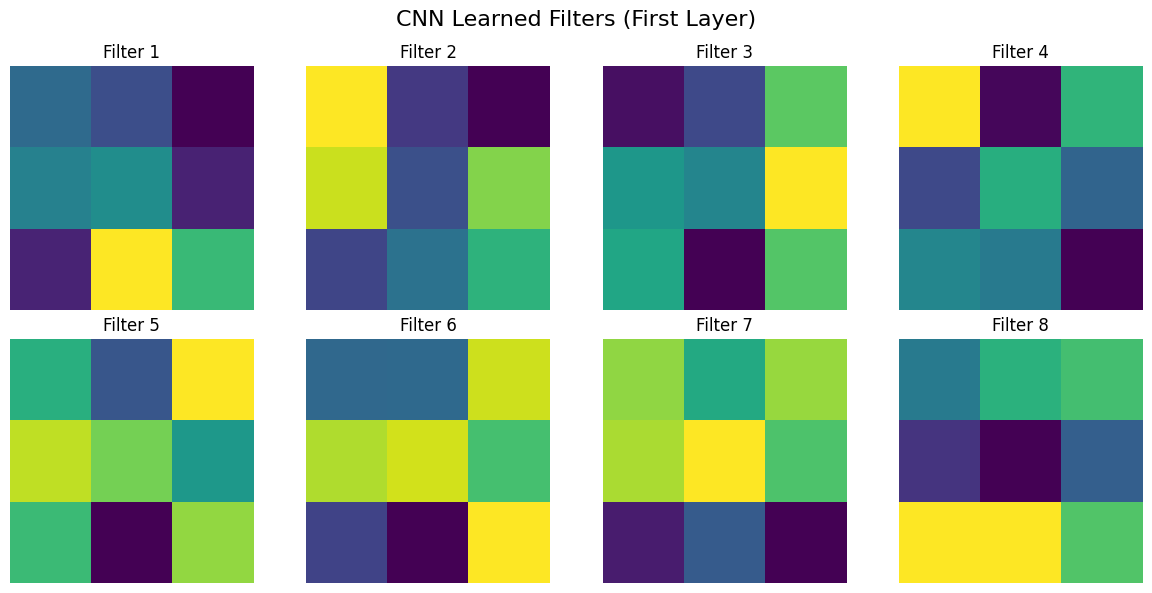

üì∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî!


Saving urban-20230228144115810458.jpg to urban-20230228144115810458.jpg


/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3309983945.py:41: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


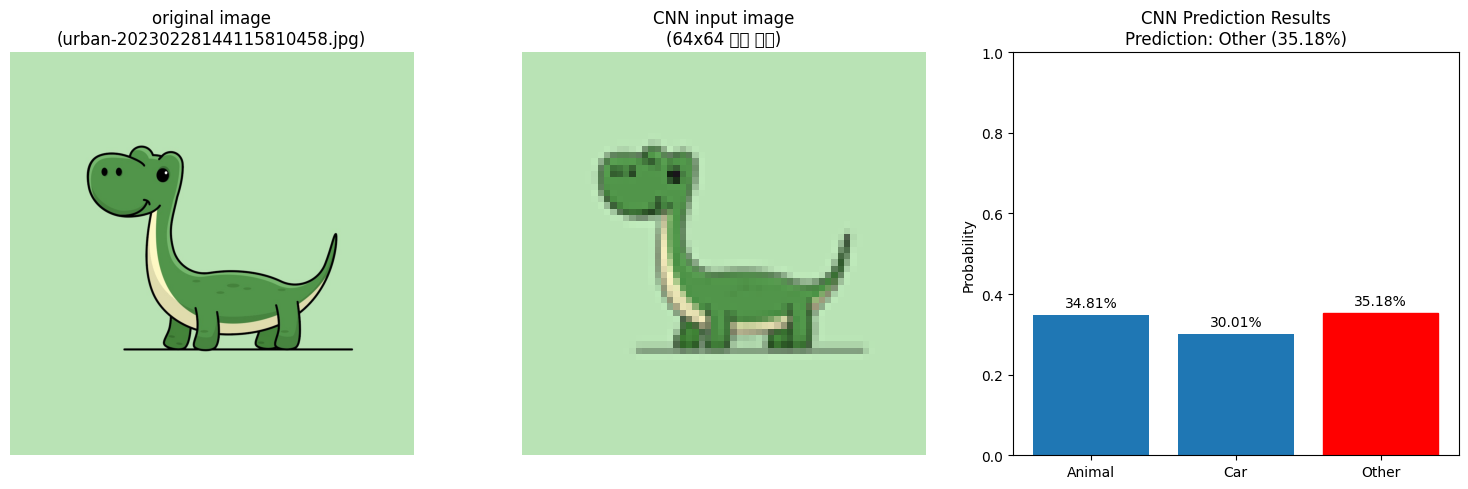


üéØ CNN Prediction Results:
   Animal: 34.81%
   Car: 30.01%
üëâ Other: 35.18%
Final Prediction: Other (Confidence: 35.18%)

üî¨ CNN ÎÇ¥Î∂Ä ÏûëÎèô Í≥ºÏ†ï ÏãúÍ∞ÅÌôî...
‚ö†Ô∏è ÌôúÏÑ±Ìôî ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: The layer sequential_1 has never been called and thus has no defined input.
üí° Ïù¥Îäî Î™®Îç∏ Íµ¨Ï°∞ÎÇò TensorFlow Î≤ÑÏ†Ñ Ïù¥ÏäàÏùº Ïàò ÏûàÏäµÎãàÎã§.
üìù Ï£ºÏöî Í∏∞Îä•(ÏòàÏ∏°)ÏùÄ Ï†ïÏÉÅ ÏûëÎèôÌï©ÎãàÎã§!

üéì CNN Îç∞Î™® ÏôÑÎ£å!
üí° Ïù¥Ï†ú CNNÏù¥ Ïñ¥ÎñªÍ≤å Ïù¥ÎØ∏ÏßÄÎ•º 'Ïù¥Ìï¥'ÌïòÎäîÏßÄ Î≥¥ÏÖ®ÏäµÎãàÎã§!


In [11]:
# üöÄ Îç∞Î™® Ïã§Ìñâ
print("üìö CNN ÍµêÏú°Ïö© Îç∞Î™® - Ïã§Ï†ú Ïã†Í≤ΩÎßùÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò Ï≤¥Ìóò")
print("üî• Ïù¥Î≤àÏóêÎäî ÏßÑÏßú CNNÏûÖÎãàÎã§!")
print()
run_cnn_demo()